# This notebook is presenting the perceptron
with different activation function 
1) step function
2) sigmoid
3) additional ussing sklearn perceptron loss function



In [57]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=15)

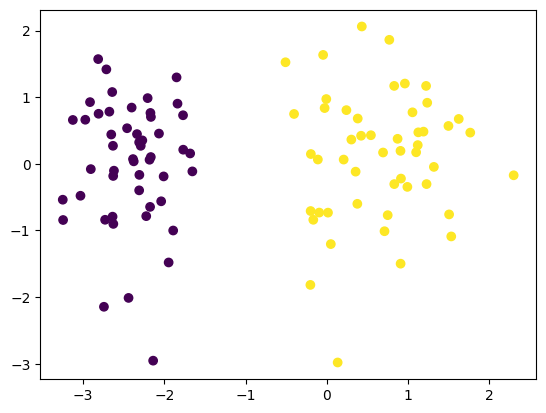

In [58]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

In [59]:
X

array([[ 0.35523945, -0.11697552],
       [-0.09282829, -0.73115232],
       [-0.1984984 , -0.7081059 ],
       [-2.44001098, -2.01199214],
       [-0.0448475 ,  1.63493163],
       [-1.68155714,  0.15599044],
       [-2.64121606,  1.07782053],
       [ 0.2416527 ,  0.80626713],
       [-0.40266099,  0.74859527],
       [-2.80888854,  0.75152794],
       [-2.62743539, -0.90114581],
       [-2.62900445, -0.1815243 ],
       [ 0.13405049, -2.98092432],
       [ 0.96162631,  1.20500136],
       [-2.67615806,  0.78302407],
       [ 0.54329928,  0.42968688],
       [ 0.01490532, -0.73229726],
       [-2.72870533, -0.83930476],
       [-0.02633711,  0.83727062],
       [-2.61974125, -0.10255323],
       [-3.1257262 ,  0.65867001],
       [-2.91434094,  0.92649819],
       [-2.16605143,  0.10216193],
       [ 1.76642459,  0.46886454],
       [-2.06564986,  0.45432938],
       [ 0.7699643 ,  1.8613386 ],
       [-2.63675549, -0.79255991],
       [-1.89063753, -1.0004391 ],
       [-3.24982176,

# 1) when using step function


In [60]:
def step(z):
    if z>0:
        return 1
    else:
        return 0

In [29]:
def perceptron(X,y,epochs=1000,lr = 0.01):

    X = np.insert(X,0,1,axis=1)
    w = np.ones(X.shape[1])

    for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(w,X[j]))

        w  = w - lr*(y[j]-y_hat)*X[j]

    return w[0],w[1:]




In [30]:

bias,weights = perceptron(X,y,epochs=1000,lr=0.5)


In [31]:
m = - (weights[0]/weights[1])
b = -(bias/weights[1])



In [32]:
x_input = np.linspace(-2,2,100)
y_input = m*x_input + b


(-3.0, 2.0)

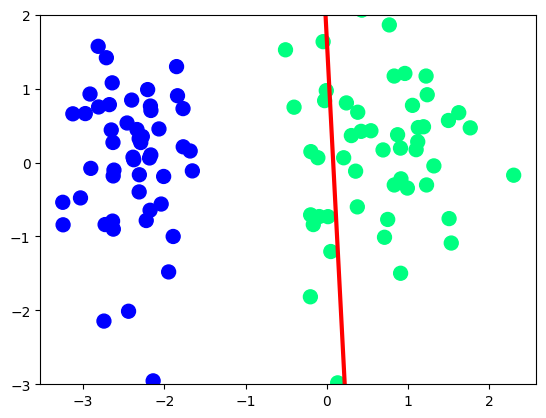

In [33]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plt.ylim(-3,2)

# 2) When using sigmoid function

In [61]:
def sigmoid(z):
    return 1/(1+np.exp(z))

In [62]:
def perceptron(X,y,epochs=1000,lr = 0.01):

    X = np.insert(X,0,1,axis=1)
    w = np.ones(X.shape[1])

    for i in range(epochs):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(w,X[j]))
        w  = w - lr*(y[j]-y_hat)*X[j]

    return w[0],w[1:]



In [63]:

bias,weights = perceptron(X,y,epochs=1000,lr=0.5)

In [64]:
m = - (weights[0]/weights[1])
b = -(bias/weights[1])



In [65]:
m,b

(np.float64(-21.226722604658388), np.float64(-20.171409811739274))

In [66]:
x_input = np.linspace(-2,2,100)
y_input = m*x_input + b

(-3.0, 2.0)

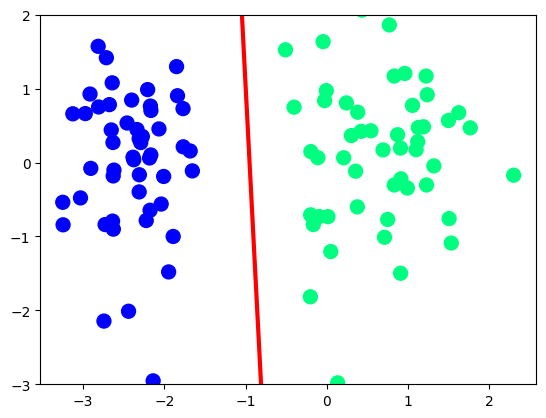

In [67]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plt.ylim(-3,2)

# 3) Trying Sklearn loss function

so like in every machine learning algorthim you need a loss function so digged around the sklearn library i found the SGD classifier
and found the loss function they use for the perceptron that is



![alt text](image.png)

In [49]:
def perceptorn(X,y):
    w1=w2=b=1
    lr = 0.1

    for j in range(1000):

        for i in range(X.shape[0]):

            # check condition
            z = w1*X[i][0] + w2*X[i][1] + b

            if z*y[i] < 0:
                w1 = w1 + lr*y[i]*X[i][0]
                w2 = w2 + lr*y[i]*X[i][1]
                b = b + lr*y[i]

    return w1,w2,b







In [50]:
w1,w2,b = perceptorn(X,y)

In [51]:
b

np.float64(1.3000000000000003)

In [52]:
w1,w2

(np.float64(1.006638570722407), np.float64(0.22215119727529098))

In [53]:
m = -(w1/w2)
b = -(b/w2)

In [54]:
m,b

(np.float64(-4.531321834268464), np.float64(-5.851870329508209))

In [55]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input+b

(-3.0, 2.0)

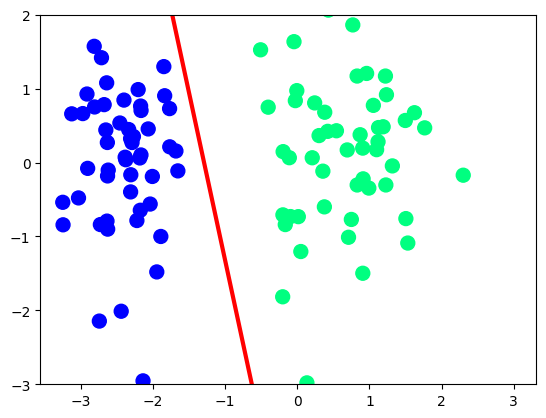

In [56]:
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap='winter')
plt.ylim(-3,2)